In [1]:
from geneformer import EmbExtractor

In [ ]:
# initiate EmbExtractor
# OF NOTE: model_version should match version of model to be used (V1 or V2) to use the correct token dictionary
embex = EmbExtractor(model_type="CellClassifier",
                     num_classes=3,
                     filter_data={"cell_type":["Cardiomyocyte1","Cardiomyocyte2","Cardiomyocyte3"]},
                     max_ncells=1000,
                     emb_layer=0,
                     emb_label=["disease","cell_type"],
                     labels_to_plot=["disease"],
                     forward_batch_size=200,
                     model_version="V1",  # OF NOTE: SET TO V1 MODEL, PROVIDE V1 MODEL PATH IN SUBSEQUENT CODE
                     nproc=16)

# extracts embedding from input data
# input data is tokenized rank value encodings generated by Geneformer tokenizer (see tokenizing_scRNAseq_data.ipynb)
# example dataset for V1 model series: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset
embs = embex.extract_embs("../fine_tuned_models/Geneformer-V1-10M_CellClassifier_cardiomyopathies_220224", # example V1 fine-tuned model
                          "path/to/input_data/",
                          "path/to/output_directory/",
                          "output_prefix")


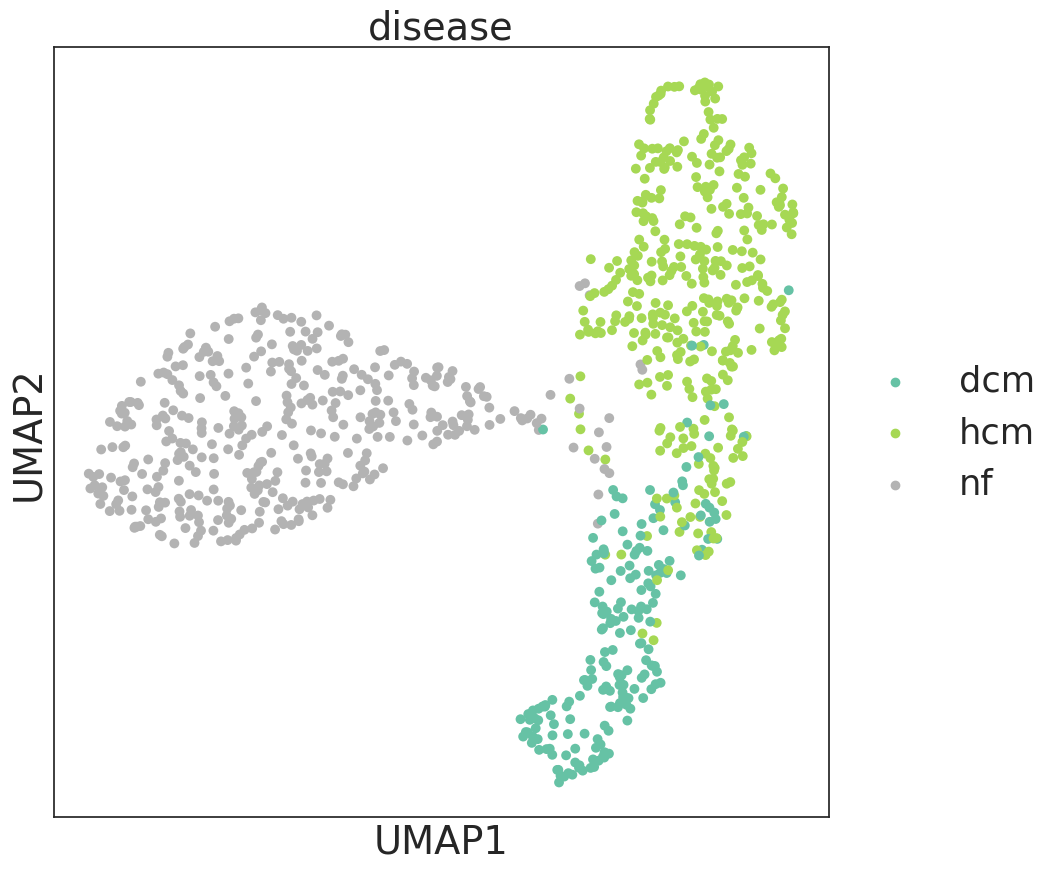

In [4]:
# plot UMAP of cell embeddings
# note: scanpy umap necessarily saves figs to figures directory
embex.plot_embs(embs=embs, 
                plot_style="umap",
                output_directory="path/to/output_directory/",  
                output_prefix="emb_plot")

<Figure size 2250x2250 with 0 Axes>

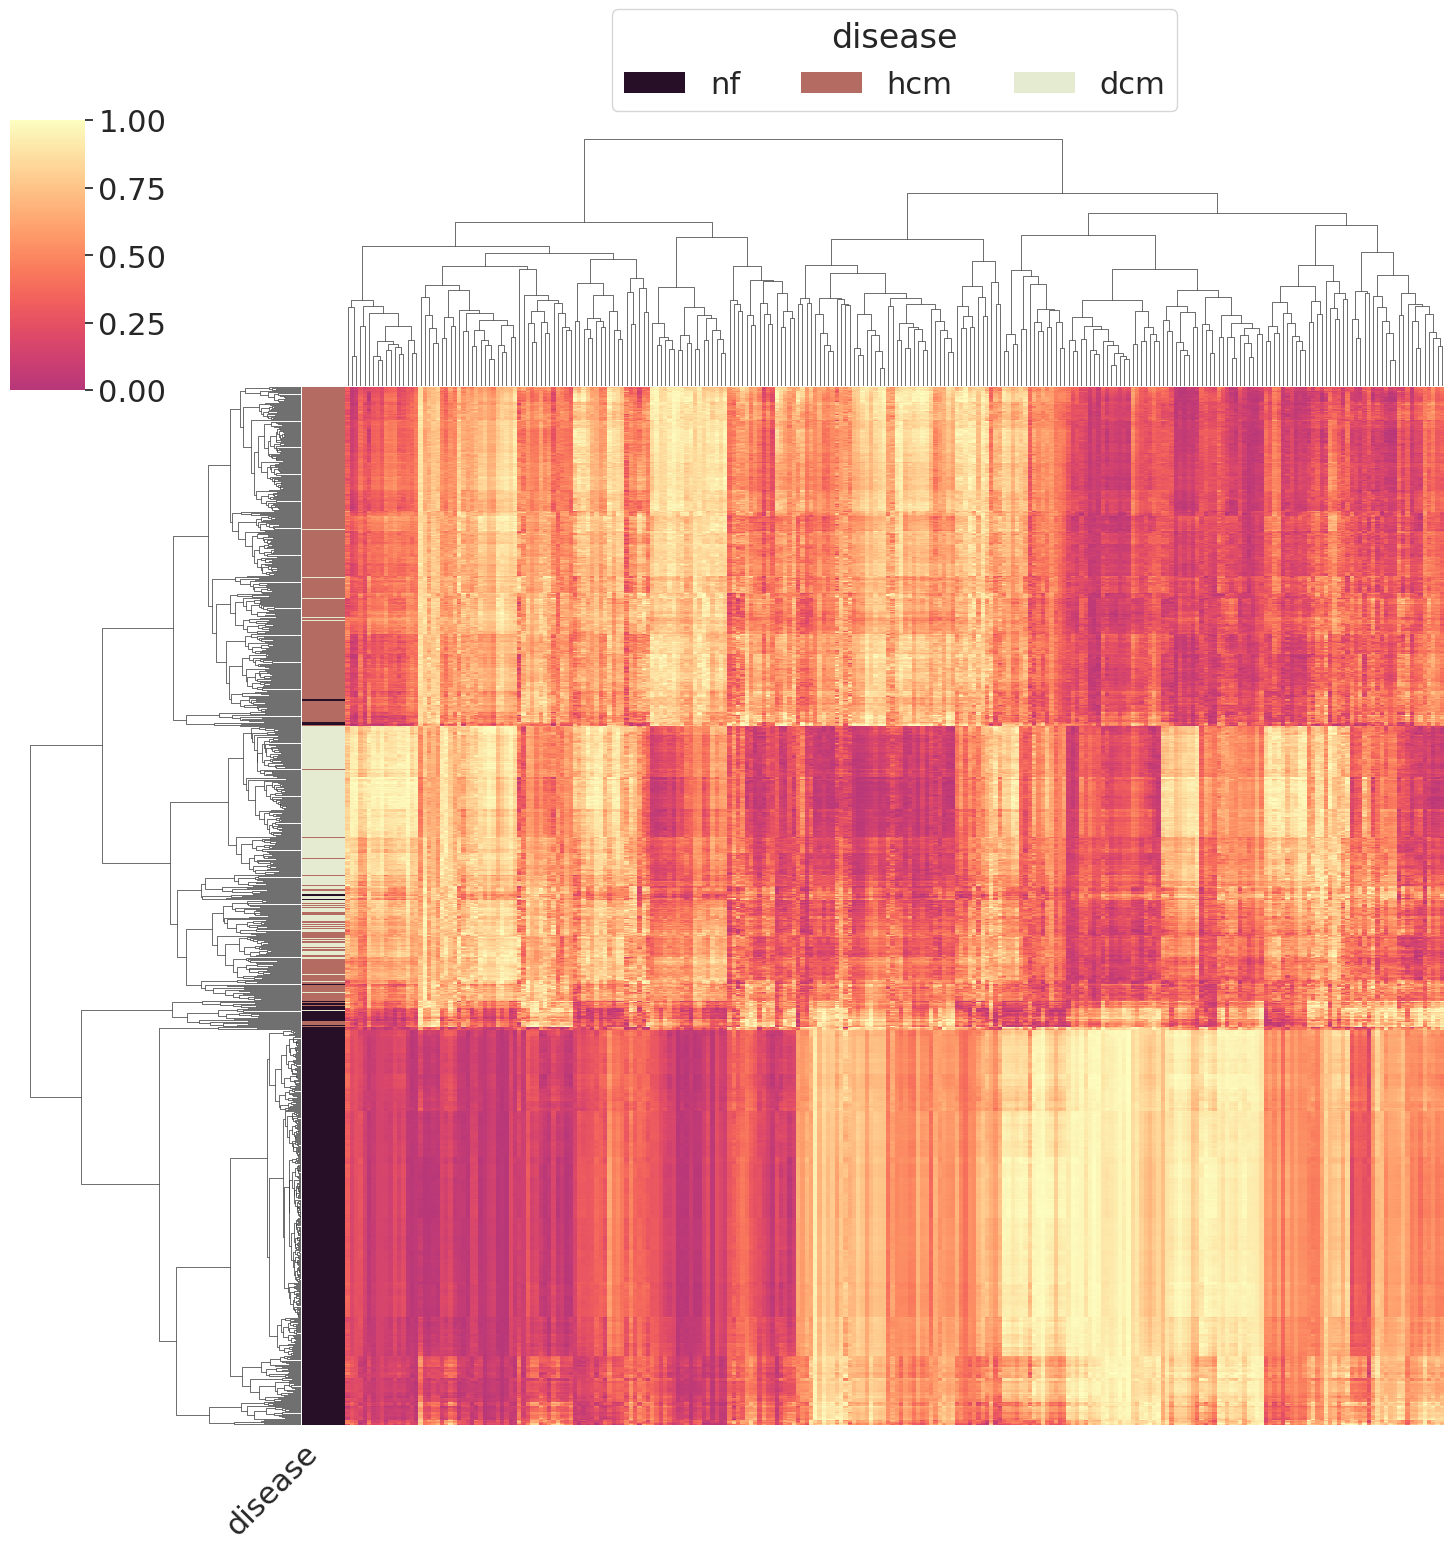

In [5]:
# plot heatmap of cell embeddings
embex.plot_embs(embs=embs, 
                plot_style="heatmap",
                output_directory="path/to/output_directory/",
                output_prefix="emb_plot")